In [1]:
import numpy as np
import pandas as pd
import plotnine as p9
import seaborn as sns
import matplotlib.pyplot as plt

import constants

plt.style.use('seaborn-v0_8-colorblind')
import polygraph.input, polygraph.sequence, polygraph.visualize

from Toy_dataset import *


In [2]:
#Defining params
seqnum=10**6
seqlen=250

In [ ]:
seqs1 = RanSequence(seqnum,seqlen,group_name="test",seed=12345,gc_content=0.7)
np.random.seed(12345)
seqs1.save("toy_dataset.txt")
seqs2 = RanSequence(seqnum,seqlen,group_name="random",seed=12345)
np.random.seed(12345)
seqs2.save("toy_dataset2.txt")

In [3]:
seqs1 = polygraph.input.read_seqs("toy_dataset.txt")
seqs2 = polygraph.input.read_seqs("toy_dataset2.txt")

In [5]:
seqs1['GC Content']=polygraph.sequence.gc(seqs1)
seqs2['GC Content']=polygraph.sequence.gc(seqs2)
seqs=pd.concat([seqs1,seqs2])
seqs

,Sequence,Group,GC Content
SeqID,,,
seq_0,CCGGCCGCGTCTGACTGCGCACCCCGCAAGTGTGTTGTCCCGCTCC...,test,0.708
seq_1,CCAGCCAGGGCGAGGCTCATCGAGCACCCCAGGTGTTCACGCATGT...,test,0.704
seq_2,GTAAGCTGGAGTTCCTCCCGAAGGCGGCCCAGGGCGCCAGTCCCCC...,test,0.716
seq_3,CCGGACCCCCATGGGTGCGCGGGGAGTGCCGCGCGCCTCATCCGAG...,test,0.732
seq_4,CTACCCACCCATGAAGCCCTACGGCGACGACCCCCACGGGGGCCCG...,test,0.704
...,...,...,...
seq_999995,GGTCCTCCACTATAGGTTAGAGTGAAATAGTCACGATGTGCTCCCT...,random,0.500
seq_999996,AGACCGTTGCTTTTCTAGTCAAGCGGATGGGACAGCACGACTGGGA...,random,0.520
seq_999997,CTGTGAGTCGTAGAGTACAGCGACGAAGACATAGGGGCTCACGCCT...,random,0.516


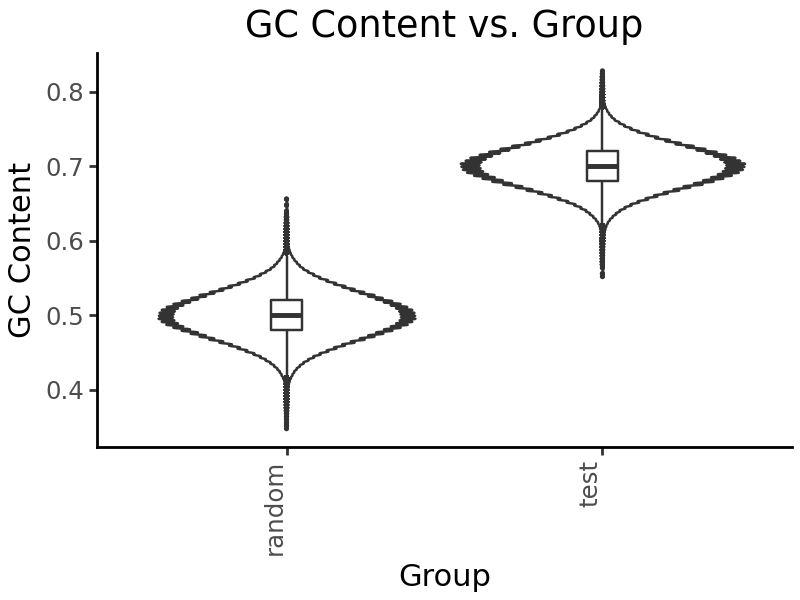

In [6]:
(p9.ggplot(seqs, p9.aes(x="Group", y="GC Content")) 
 + p9.geom_violin()
 + p9.geom_boxplot(width=0.1, outlier_size=0.05)
 + p9.ggtitle("GC Content vs. Group")
 + p9.theme_classic()
 + p9.theme(axis_text_x=p9.element_text(rotation=90, hjust=1),figure_size=(4,3))
)


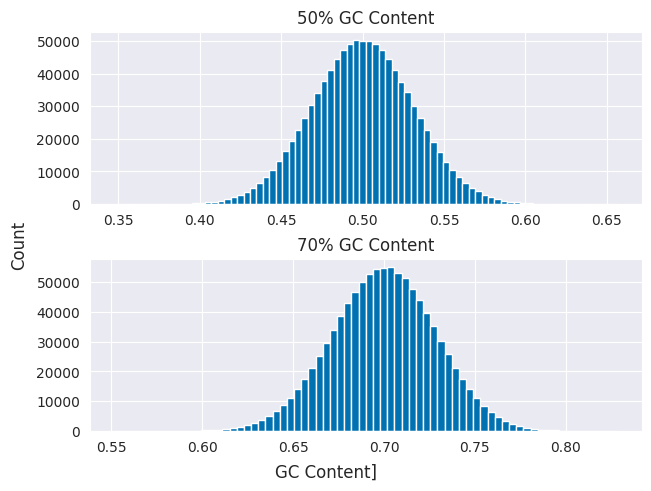

In [12]:
fig,axs = plt.subplots(nrows=2, ncols=1,layout='constrained' )

axs[0].hist(seqs2['GC Content'], bins=78)
axs[0].set_title("50% GC Content")
axs[1].hist(seqs1['GC Content'], bins=70)
axs[1].set_title("70% GC Content")

fig.supxlabel('GC Content]')
fig.supylabel('Count')
plt.show()